In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_score(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    #xglm_path = f'/{src_context_size}-1/en-{lang}/xglm-{lang}-1-1/test_score.txt'
    #llama_path = f'/1-1/en-{lang}/llama-{lang}-1-1/test_score.txt'

    lang_list = os.listdir(disk_dir + f"/{context_size}")
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    print (lang_list)

    lang_scores = {}

    #for model_path in [xglm_path, llama_path]:
    for lang in lang_list:
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        print (score_path)
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:    
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
       
    #print (lang_scores) #str.replace("\n", "")

    # Sample data: replace this with your actual data
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [3]:
xglm_comet_list, xglm_bleu_list, lang_list = get_score("1-1","xglm")
print (xglm_comet_list)
print()
xglm_comet_list_2, xglm_bleu_list_2, lang_list = get_score("2-1","xglm")
print (xglm_comet_list_2)
print ()
llama_comet_list, llama_bleu_list, lang_list = get_score("1-1","llama")
print (llama_comet_list)
llama_comet_list_2, llama_bleu_list_2, lang_list = get_score("2-1","llama")
print (llama_comet_list_2)

['ar', 'fr', 'ja', 'ko', 'de', 'zh']
/mnt/data-poseidon/sumire/thesis/1-1/en-ar/xglm-ar-1-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/1-1/en-fr/xglm-fr-1-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/1-1/en-ja/xglm-ja-1-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/1-1/en-ko/xglm-ko-1-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/1-1/en-de/xglm-de-1-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/1-1/en-zh/xglm-zh-1-1/test_score.txt
[0.7363996815286622, 0.6577577106518289, 0.7286548387096775, 0.7128320388349516, 0.6608086956521741, 0.7443851437699676]

['ar', 'fr', 'ja', 'ko', 'de', 'zh']
/mnt/data-poseidon/sumire/thesis/2-1/en-ar/xglm-ar-2-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/2-1/en-fr/xglm-fr-2-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/2-1/en-ja/xglm-ja-2-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/2-1/en-ko/xglm-ko-2-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/2-1/en-de/xglm-de-2-1/test_score.txt
/mnt/data-poseidon/sumire/thesis/2

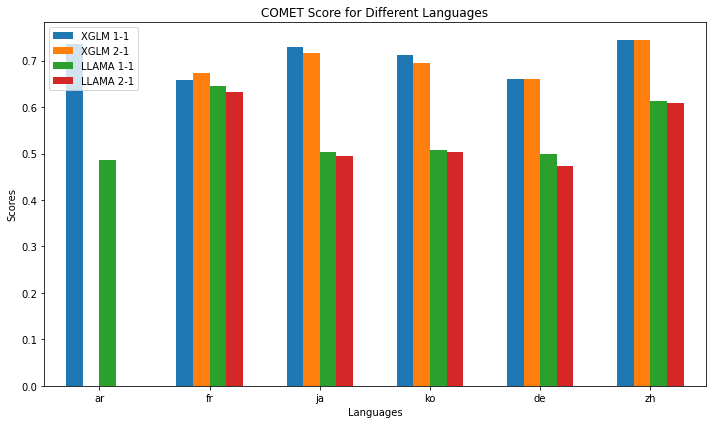

In [20]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.15  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width*1.5, xglm_comet_list, width, label='XGLM 1-1')
rects2 = ax.bar(x - width*0.5, xglm_comet_list_2, width, label='XGLM 2-1')
rects3 = ax.bar(x +width*0.5, llama_comet_list, width, label='LLAMA 1-1')
rects4 = ax.bar(x + width*1.5, llama_comet_list_2, width, label='LLAMA 2-1')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


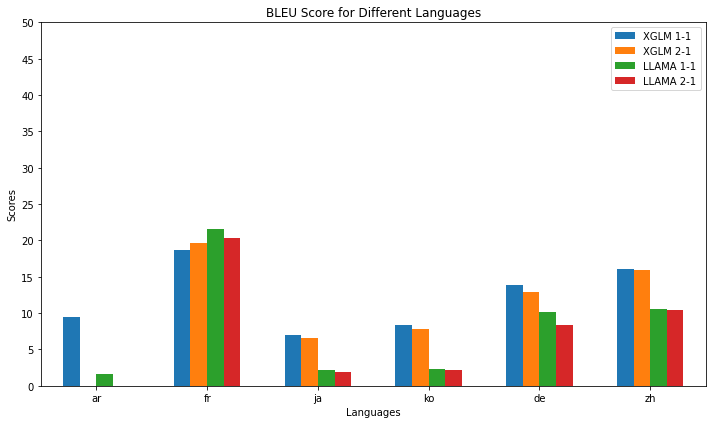

In [18]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.15  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width*1.5, xglm_bleu_list, width, label='XGLM 1-1')
rects2 = ax.bar(x - width*0.5, xglm_bleu_list_2, width, label='XGLM 2-1')
rects3 = ax.bar(x + width*0.5, llama_bleu_list, width, label='LLAMA 1-1')
rects4 = ax.bar(x + width*1.5, llama_bleu_list_2, width, label='LLAMA 2-1')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

plt.yticks(range(0, 55,5))

# Displaying the plot
plt.tight_layout()
plt.show()